In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.drop(columns=['CustomerId'],inplace=True)

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df_new=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df_new=df_new.astype(int)
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [26]:
X=df_new.drop(columns=['Exited'])
y=df_new['Exited']

In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [34]:
y_test.shape

(2000,)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_saled=scaler.fit_transform(X_train)
X_test_saled=scaler.fit_transform(X_test)

In [51]:
X_train_saled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


In [73]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [74]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [83]:
history=model.fit(X_train_saled,y_train,epochs=100,validation_split=.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3090 - val_accuracy: 0.8531 - val_loss: 0.3333
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8753 - loss: 0.3090 - val_accuracy: 0.8562 - val_loss: 0.3318
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3062 - val_accuracy: 0.8525 - val_loss: 0.3360
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.3120 - val_accuracy: 0.8606 - val_loss: 0.3316
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8783 - loss: 0.3097 - val_accuracy: 0.8556 - val_loss: 0.3324
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8755 - loss: 0.3088 - val_accuracy: 0.8581 - val_loss: 0.3319
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8685 - loss: 0.3124 - val_accuracy: 0.8537 - val_loss: 0.3333
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.3179 - val_accu

In [78]:
model.layers[0].get_weights()

[array([[ 4.22028737e-04, -7.62338161e-01, -7.86049306e-01,
         -9.40206181e-03,  2.51394629e-01,  1.86001703e-01,
         -2.20464170e-02,  1.64712280e-01, -1.16152942e-01,
          2.10633516e-01, -7.49396980e-02],
        [-8.30716312e-01,  5.81950009e-01,  3.10681254e-01,
          2.55266577e-01, -1.65313527e-01, -8.62462342e-01,
          2.03924716e-01, -4.89812531e-02,  3.81343178e-02,
          1.22391427e+00,  1.20325339e+00],
        [-2.62310833e-01, -1.03262171e-01,  1.53593630e-01,
         -2.24313840e-01, -2.04399288e-01, -5.07407129e-01,
         -3.35559726e-01,  2.79935617e-02, -1.82730883e-01,
          9.39514339e-02, -1.57235214e-03],
        [-3.18428606e-01, -1.08833022e-01, -5.35529554e-02,
          7.49589026e-01, -8.94221187e-01, -4.07339841e-01,
          1.16122174e+00,  6.25412345e-01,  2.81162232e-01,
          1.97235383e-02,  3.82370949e-01],
        [ 9.72179532e-01, -7.59851336e-01,  2.46159524e-01,
          1.01800346e+00, -7.31114507e-01, -

In [79]:
y_log=model.predict(X_test_saled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [80]:
y_pred=np.where(y_log>.5,1,0)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test,y_pred)

0.862

In [84]:
import matplotlib.pyplot as plt

In [85]:
history.history

{'accuracy': [0.8698437213897705,
  0.87109375,
  0.8701562285423279,
  0.8682812452316284,
  0.8715624809265137,
  0.8687499761581421,
  0.8673437237739563,
  0.8704687356948853,
  0.8704687356948853,
  0.8706250190734863,
  0.870312511920929,
  0.87109375,
  0.8701562285423279,
  0.8698437213897705,
  0.8689062595367432,
  0.8698437213897705,
  0.8707812428474426,
  0.8698437213897705,
  0.8696874976158142,
  0.8685937523841858,
  0.8698437213897705,
  0.8682812452316284,
  0.8684375286102295,
  0.8712499737739563,
  0.8707812428474426,
  0.8707812428474426,
  0.8712499737739563,
  0.8701562285423279,
  0.870312511920929,
  0.8704687356948853,
  0.8704687356948853,
  0.8695312738418579,
  0.8704687356948853,
  0.8695312738418579,
  0.8704687356948853,
  0.8698437213897705,
  0.8696874976158142,
  0.8717187643051147,
  0.8712499737739563,
  0.8695312738418579,
  0.8715624809265137,
  0.8706250190734863,
  0.8690624833106995,
  0.8706250190734863,
  0.8704687356948853,
  0.869531273841

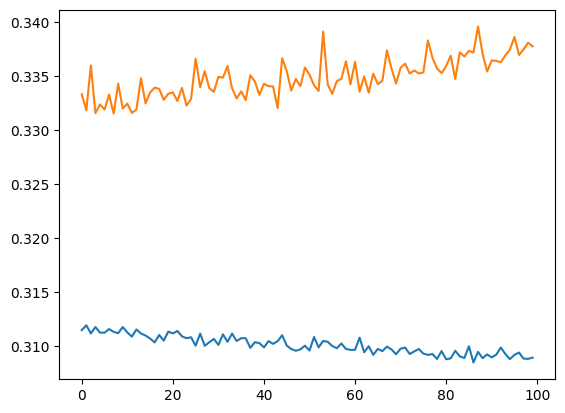

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

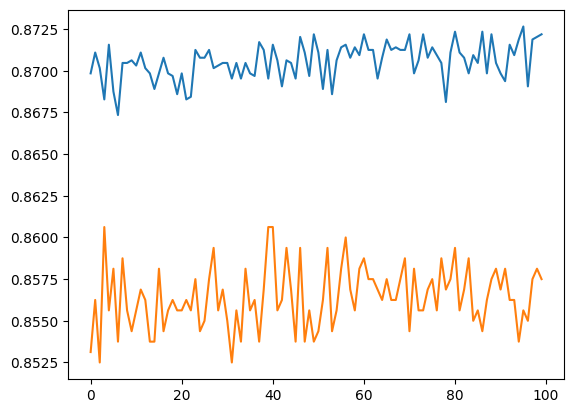

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])